In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [2]:
well1 = pd.read_csv('well1.csv', index_col='date', parse_dates=True)
well1.head()

bhp         bht   dp_tubing         thp        tht  \
date                                                                    
2008-02-12  308.055940  104.418090  201.250000  106.805939  16.294718   
2008-02-13  303.033518  105.402696  182.144942  120.888576  53.374330   
2008-02-14  295.586061  105.775486  181.867887  113.718175  72.737631   
2008-02-15  297.662702  105.751875  180.832060  116.830642  69.995943   
2008-02-16  295.935519  105.811114  180.501045  115.434474  71.518347   

            choke_size_percentage           QL             QG  
date                                                           
2008-02-12              92.475107  1397.551304   81158.963478  
2008-02-13              89.620148  1876.830000  285246.160000  
2008-02-14              80.120465  3333.600000  543951.872000  
2008-02-15              84.250990  2705.053996  397504.971058  
2008-02-16              82.359026  3056.690000  418474.000000

[Text(0.5, 0, 'date(day)'), Text(0, 0.5, 'temperature(F)')]

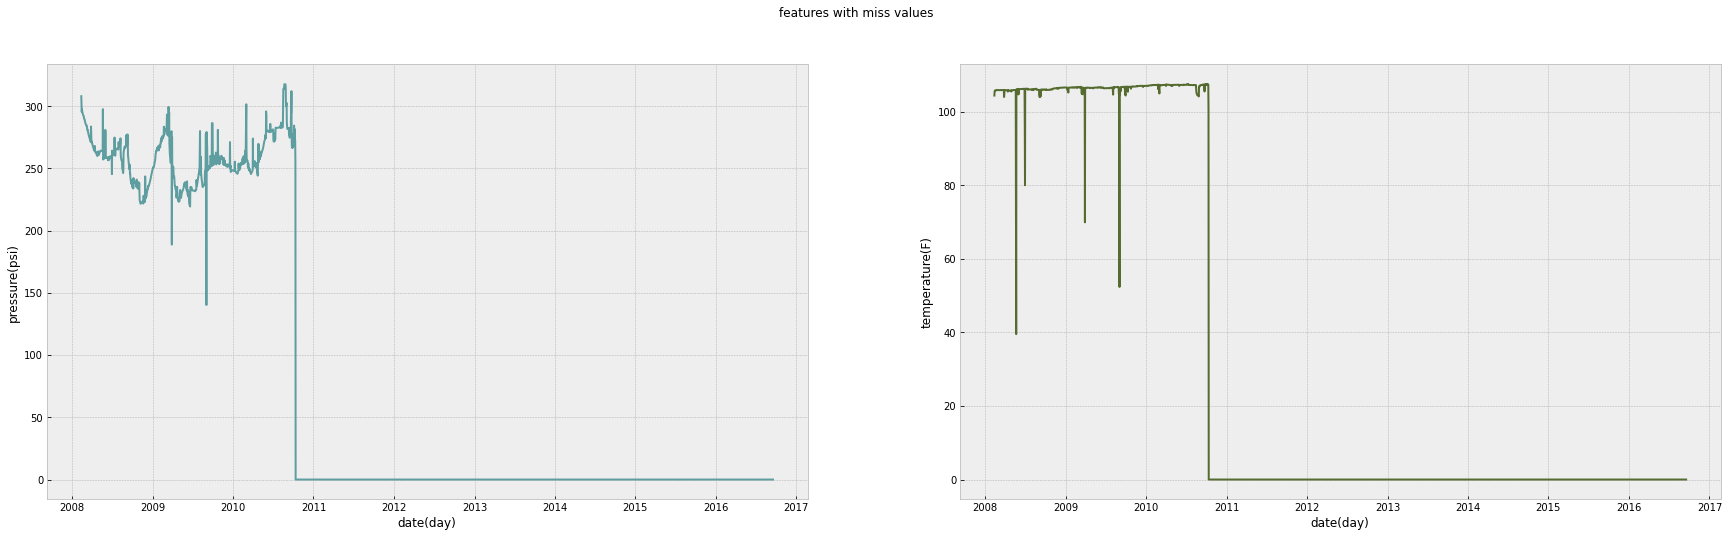

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))
fig.suptitle('features with miss values')

#plot 1
ax1.plot( well1.index, well1['bhp'], color='cadetblue')
ax1.set(xlabel='date(day)', ylabel='pressure(psi)')

# plot2
ax2.plot( well1.index, well1['bht'], color='darkolivegreen')
ax2.set(xlabel='date(day)', ylabel='temperature(F)')




In [4]:
last_1day = well1.shift(+1)
last_2day = well1.shift(+2)

last_1day.rename(columns={
    'bhp' : '1last_bhp',
    'bht' : '1last_bht',
    'dp_tubing' : '1last_dp_tubing',
    'AVG_CHOKE_SIZE_P' : '1last_AVG_CHOKE_SIZE_P',
    'thp' : '1last_thp',
    'tht' : "1last_tht",
    "choke_size_percentage" : "1last_choke_size_percentage",
    "QL" : "1last_QL",
    "QG" : "1last_QG"
}, inplace=True)
last_2day.rename(columns={
    'bhp' : '2last_bhp',
    'bht' : '2last_bht',
    'dp_tubing' : '2last_dp_tubing',
    'AVG_CHOKE_SIZE_P' : '2last_AVG_CHOKE_SIZE_P',
    'thp' : '2last_thp',
    'tht' : "2last_tht",
    "choke_size_percentage" : "2last_choke_size_percentage",
    "QL" : "2last_QL",
    "QG" : "2last_QG"    
}, inplace=True)

df = pd.concat([well1, last_1day, last_2day], axis=1)
df.head()

bhp         bht   dp_tubing         thp        tht  \
date                                                                    
2008-02-12  308.055940  104.418090  201.250000  106.805939  16.294718   
2008-02-13  303.033518  105.402696  182.144942  120.888576  53.374330   
2008-02-14  295.586061  105.775486  181.867887  113.718175  72.737631   
2008-02-15  297.662702  105.751875  180.832060  116.830642  69.995943   
2008-02-16  295.935519  105.811114  180.501045  115.434474  71.518347   

            choke_size_percentage           QL             QG   1last_bhp  \
date                                                                        
2008-02-12              92.475107  1397.551304   81158.963478         NaN   
2008-02-13              89.620148  1876.830000  285246.160000  308.055940   
2008-02-14              80.120465  3333.600000  543951.872000  303.033518   
2008-02-15              84.250990  2705.053996  397504.971058  295.586061   
2008-02-16              82.359026  3056.690000  418474.000000  297.662702   

             1last_bht  ...     1last_QL       1last_QG   2last_bhp  \
date                    ...                                           
2008-02-12         NaN  ...          NaN            NaN         NaN   
2008-02-13  104.418090  ...  1397.551304   81158.963478         NaN   
2008-02-14  105.402696  ...  1876.830000  285246.160000  308.055940   
2008-02-15  105.775486  ...  3333.600000  543951.872000  303.033518   
2008-02-16  105.751875  ...  2705.053996  397504.971058  295.586061   

             2last_bht  2last_dp_tubing   2last_thp  2last_tht  \
date                                                             
2008-02-12         NaN              NaN         NaN        NaN   
2008-02-13         NaN              NaN         NaN        NaN   
2008-02-14  104.418090       201.250000  106.805939  16.294718   
2008-02-15  105.402696       182.144942  120.888576  53.374330   
2008-02-16  105.775486       181.867887  113.718175  72.737631   

            2last_choke_size_percentage     2last_QL       2last_QG  
date                                                                 
2008-02-12                          NaN          NaN            NaN  
2008-02-13                          NaN          NaN            NaN  
2008-02-14                    92.475107  1397.551304   81158.963478  
2008-02-15                    89.620148  1876.830000  285246.160000  
2008-02-16                    80.120465  3333.600000  543951.872000  

[5 rows x 24 columns]

In [5]:
df.dropna(inplace=True)
df.isna().sum()

bhp                            0
bht                            0
dp_tubing                      0
thp                            0
tht                            0
choke_size_percentage          0
QL                             0
QG                             0
1last_bhp                      0
1last_bht                      0
1last_dp_tubing                0
1last_thp                      0
1last_tht                      0
1last_choke_size_percentage    0
1last_QL                       0
1last_QG                       0
2last_bhp                      0
2last_bht                      0
2last_dp_tubing                0
2last_thp                      0
2last_tht                      0
2last_choke_size_percentage    0
2last_QL                       0
2last_QG                       0
dtype: int64

In [9]:
true_df = df[df['bhp'] > 0]
predict_df = df[df['bhp'] == 0]

In [7]:
import xgboost as xgb
model_bhp = xgb.Booster()
model_bhp.load_model('bhp.json')

In [8]:
model_bht = xgb.Booster()
model_bht.load_model('bht.json')

In [15]:
bhp, bht = predict_df.drop(['bhp', 'bht'], axis=1), predict_df.drop(['bht', 'bhp'], axis=1)
X_bhp = predict_df.drop(['bhp', 'bht'],axis=1)[0:1]
X_bht = predict_df.drop(['bht', 'bhp'],axis=1)[0:1]

In [16]:
X_bhp

dp_tubing       thp        tht  choke_size_percentage       QL  \
date                                                                         
2010-10-12   54.10804  54.10804  89.468313              21.532416  5136.18   

                   QG   1last_bhp   1last_bht  1last_dp_tubing  1last_thp  \
date                                                                        
2010-10-12  265044.85  253.851983  100.388751        199.58276  54.269223   

            ...  1last_QL   1last_QG   2last_bhp   2last_bht  2last_dp_tubing  \
date        ...                                                                 
2010-10-12  ...   5251.67  265545.94  272.757986  107.403693       218.247471   

            2last_thp  2last_tht  2last_choke_size_percentage  2last_QL  \
date                                                                      
2010-10-12  54.510514  88.819878                    21.960317   5073.03   

             2last_QG  
date                   
2010-10-12  267093.36  

[1 rows x 22 columns]

In [17]:
for i, num in enumerate(predict_df['bhp']):
    
    X_bhp = xgb.DMatrix(X_bhp)
    P = model_bhp.predict(X_bhp)
    
    X_bht = xgb.DMatrix(X_bht)
    T = model_bht.predict(X_bht)
    
    predict_df['bht'][i:i+1] = T
    predict_df['bhp'][i:i+1] = P
    
    if i+1 == len(predict_df['bhp']):
        break
    
    predict_df['1last_bhp'][i+1:i+2] = P
    predict_df['1last_bht'][i+1:i+2] = T
    
    predict_df['2last_bhp'][i+1:i+2] = predict_df['1last_bhp'][i:i+1]
    predict_df['2last_bht'][i+1:i+2] = predict_df['1last_bht'][i:i+1]
    
    X_bhp = predict_df.drop(['bhp', 'bht'],axis=1)[i+1:i+2]
    X_bht = predict_df.drop(['bht', 'bhp'],axis=1)[i+1:i+2]

C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_8200\3226959247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['bht'][i:i+1] = T
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_8200\3226959247.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['bhp'][i:i+1] = P
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_8200\3226959247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['1last_bhp'

In [22]:
df_well = pd.concat([true_df, predict_df], axis=0)

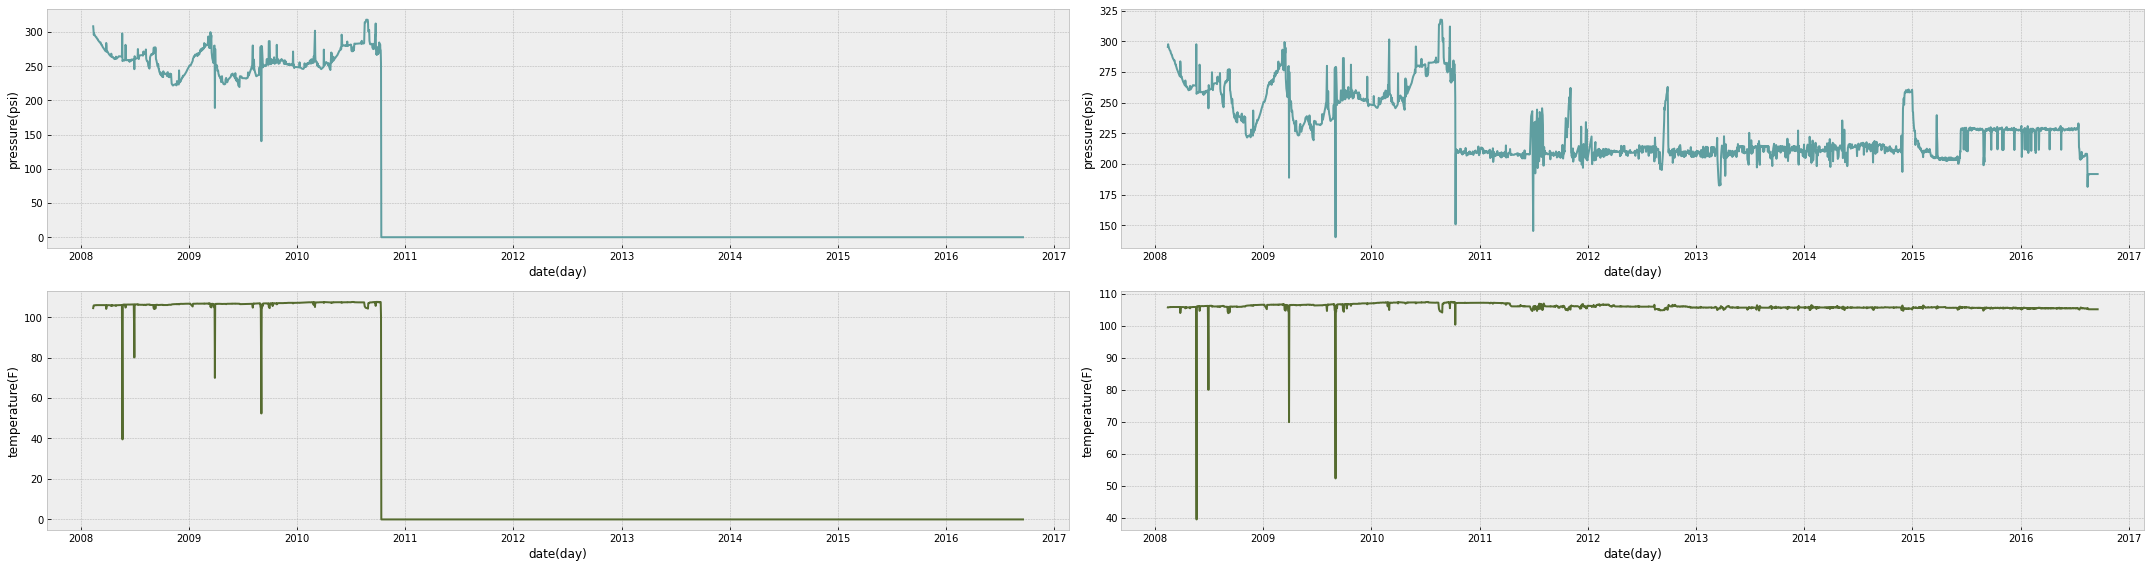

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(30, 8))

axs[0, 0].plot( well1.index, well1['bhp'], color='cadetblue')
axs[0, 0].set(xlabel='date(day)', ylabel='pressure(psi)')

axs[1, 0].plot( well1.index, well1['bht'], color='darkolivegreen')
axs[1, 0].set(xlabel='date(day)', ylabel='temperature(F)')

axs[0, 1].plot( df_well.index, df_well['bhp'], color='cadetblue')
axs[0, 1].set(xlabel='date(day)', ylabel='pressure(psi)')

axs[1, 1].plot( df_well.index, df_well['bht'], color='darkolivegreen')
axs[1, 1].set(xlabel='date(day)', ylabel='temperature(F)')
fig.tight_layout()


In [34]:
df_well.columns

Index(['bhp', 'bht', 'dp_tubing', 'thp', 'tht', 'choke_size_percentage', 'QL',
       'QG', '1last_bhp', '1last_bht', '1last_dp_tubing', '1last_thp',
       '1last_tht', '1last_choke_size_percentage', '1last_QL', '1last_QG',
       '2last_bhp', '2last_bht', '2last_dp_tubing', '2last_thp', '2last_tht',
       '2last_choke_size_percentage', '2last_QL', '2last_QG'],
      dtype='object')

In [36]:
df_well = df_well[['bhp', 'bht', 'dp_tubing', 'thp', 'tht', 'choke_size_percentage', 'QL', 'QG']]

In [37]:
df_well.head()

bhp         bht   dp_tubing         thp        tht  \
date                                                                    
2008-02-14  295.586061  105.775486  181.867887  113.718175  72.737631   
2008-02-15  297.662702  105.751875  180.832060  116.830642  69.995943   
2008-02-16  295.935519  105.811114  180.501045  115.434474  71.518347   
2008-02-17  295.551657  105.831299  180.345781  115.205876  73.641800   
2008-02-18  294.211063  105.866467  180.929248  113.281815  74.160157   

            choke_size_percentage           QL             QG  
date                                                           
2008-02-14              80.120465  3333.600000  543951.872000  
2008-02-15              84.250990  2705.053996  397504.971058  
2008-02-16              82.359026  3056.690000  418474.000000  
2008-02-17              82.168501  2984.480000  422763.000000  
2008-02-18              80.263045  3116.869565  431823.652174

In [39]:
df_well.to_csv('ready_data.csv')